# 2D shells

Init sympy

In [2]:
from sympy import *
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
alpha1, alpha2, R, L, ga, gv = symbols("alpha_1 alpha_2 R L g_a g_v")
init_printing()

## Cylindrical coordinates

In [3]:
a1 = pi / 2 + (L / 2 - alpha1)/R

x = R * cos(a1)
y = R * sin(a1)

r = x*N.i + y*N.j

#### Curve in 2D coordinates system will be defined with the following vector $\vec{r}=\vec{r(\alpha_1)}$

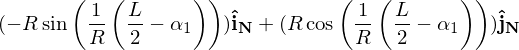

In [4]:
r

#### Tangent to curve

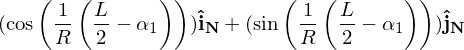

In [24]:
v_temp = r.diff(alpha1)
dr_len = v_temp.magnitude()
v = v_temp / dr_len
v = trigsimp(v)
v

In [26]:
trigsimp(dr_len)

#### Normal to curve

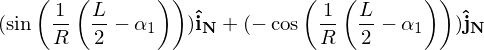

In [21]:
n_temp = v.diff(alpha1)
k=trigsimp(n_temp.magnitude())
n = n_temp/k
q=1/(R*sqrt(1/R**2))
n = trigsimp(n).subs(q, 1)
n

In [11]:
v.dot(n)

In [12]:
n.dot(v)

#### Curvature

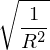

In [14]:
sympify(k)

#### Derivative of base vectors

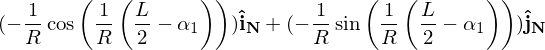

In [18]:
n.diff(alpha1)

$ \frac { d\vec{n} } { d\alpha_1} = -\frac {1}{R} \vec{v} = -k \vec{v} $

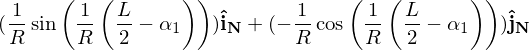

In [20]:
v.diff(alpha1)

$ \frac { d\vec{v} } { d\alpha_1} = \frac {1}{R} \vec{n} = k \vec{n} $

#### Derivative of vectors

$ \vec{u} = u_v \vec{v} + u_n\vec{n} $

$ \frac { d\vec{u} } { d\alpha_1} =  \frac { d(u_v\vec{v}) } { d\alpha_1} + \frac { d(u_n\vec{n}) } { d\alpha_1} = 
 \frac { du_n } { d\alpha_1} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_1} + \frac { du_v } { d\alpha_1} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_1} = \frac { du_n } { d\alpha_1} \vec{n} - u_n k \vec{v} + \frac { du_v } { d\alpha_1} \vec{v} + u_v k \vec{n} = $

$ \frac { d\vec{u} } { d\alpha_1} = \left( \frac { du_v } { d\alpha_1} - u_n k \right) \vec{v} + \left( \frac { du_n } { d\alpha_1} + u_v k \right) \vec{n}$

$ \frac { d\vec{u} } { d\alpha_2} = \frac { d(u_n\vec{n}) } { d\alpha_2} + \frac { d(u_v\vec{v}) } { d\alpha_2} = 
 \frac { du_n } { d\alpha_2} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_2} + \frac { du_v } { d\alpha_2} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_2} = \frac { du_n } { d\alpha_2} \vec{n} + \frac { du_v } { d\alpha_2} \vec{v} $

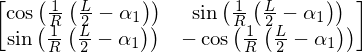

In [36]:
m11=v.dot(N.i)
m12=n.dot(N.i)
m21=v.dot(N.j)
m22=n.dot(N.j)
m=Matrix([[m11, m12], [m21, m22]])
m

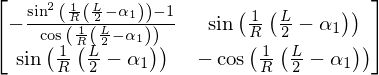

In [39]:
m_inv = m**-1
m_inv

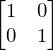

In [42]:
trigsimp(m*m_inv)

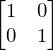

In [46]:
trigsimp(m*m)

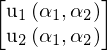

In [60]:
u1 = Function("u_1")
u2 = Function("u_2")
u=Matrix([u1(alpha1,alpha2), u2(alpha1,alpha2)])
u

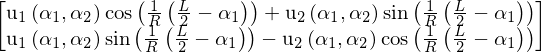

In [61]:
u_alpha = m*u
u_alpha

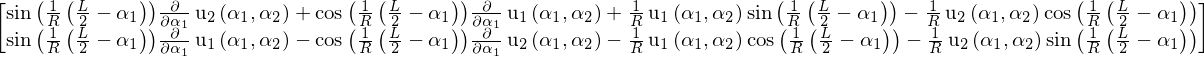

In [65]:
trigsimp(u_alpha.diff(alpha1))

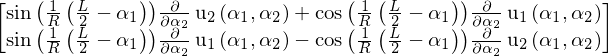

In [66]:
trigsimp(u_alpha.diff(alpha2))

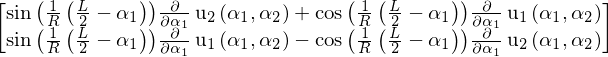

In [68]:
m*u.diff(alpha1)

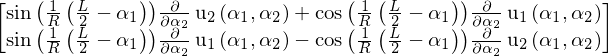

In [69]:
m*u.diff(alpha2)